# Think Bayes

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Joint

import thinkplot

## Bayesian regression

This notebook presents a simple example of Bayesian regression using sythetic data

### Data

Suppose there is a linear relationship between `x` and `y` with slope 2 and intercept 1, but the measurements of `y` are noisy; specifically, the noise is Gaussian with mean 0 and `sigma = 0.3`. 

In [2]:
slope = 2
inter = 1
sigma = 0.3

0.3

In [3]:
xs = np.linspace(0, 1, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [4]:
ys = inter + slope * xs + np.random.normal(0, sigma, len(xs))

array([0.85872942, 1.7858232 , 2.71671663, 2.13273722, 2.28519783,
       2.99567822])

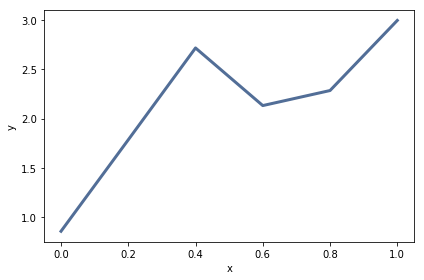

In [5]:
thinkplot.plot(xs, ys)
thinkplot.decorate(xlabel='x',
                   ylabel='y')

### Grid algorithm

We can solve the problem first using a grid algorithm, with uniform priors for slope, intercept, and sigma.

As an exercise, fill in this likelihood function, then test it using the code below.

Your results will depend on the random data you generated, but in general you should find that the posterior marginal distributions peak near the actual parameters.

In [6]:
from scipy.stats import norm

class Regress(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: x, y
        hypo: slope, inter, sigma
        """
        return 1

In [7]:
# Solution

from scipy.stats import norm

class Regress(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: x, y
        hypo: slope, inter, sigma
        """
        x, y = data
        slope, inter, sigma = hypo
        
        yfit = inter + slope * x
        error = yfit - y
        like = norm(0, sigma).pdf(error)
        return like

In [8]:
params = np.linspace(-4, 4, 21)

array([-4. , -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2, -0.8, -0.4,  0. ,
        0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ])

In [9]:
sigmas = np.linspace(0.1, 2, 20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [10]:
from itertools import product
hypos = product(params, params, sigmas)

In [11]:
suite = Regress(hypos);

In [12]:
for data in zip(xs, ys):
    suite.Update(data)

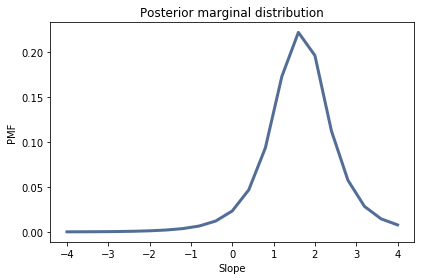

In [13]:
thinkplot.Pdf(suite.Marginal(0))
thinkplot.decorate(xlabel='Slope',
                   ylabel='PMF',
                   title='Posterior marginal distribution')

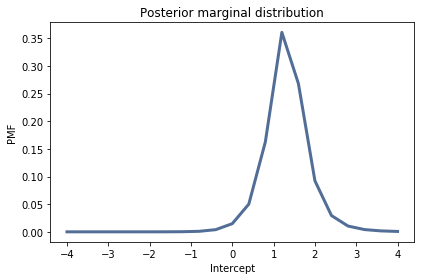

In [14]:
thinkplot.Pdf(suite.Marginal(1))
thinkplot.decorate(xlabel='Intercept',
                   ylabel='PMF',
                   title='Posterior marginal distribution')

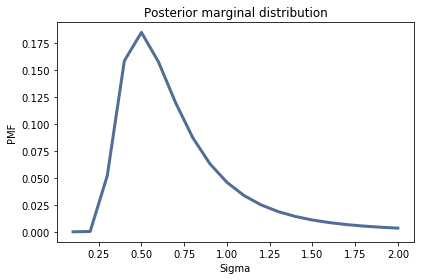

In [15]:
thinkplot.Pdf(suite.Marginal(2))
thinkplot.decorate(xlabel='Sigma',
                   ylabel='PMF',
                   title='Posterior marginal distribution')

### MCMC

Implement this model using MCMC.  As a starting place, you can use this example from [Computational Statistics in Python](http://people.duke.edu/~ccc14/sta-663-2016/16C_PyMC3.html#Linear-regression).

You also have the option of using the GLM module, [described here](https://docs.pymc.io/notebooks/GLM-linear.html).

In [17]:
import pymc3 as pm
pm.GLM

/home/downey/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


pymc3.glm.linear.GLM

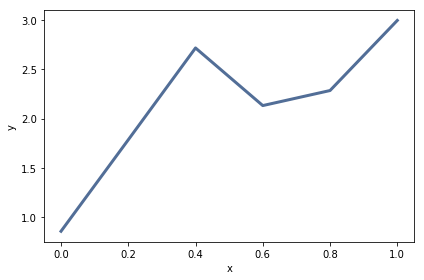

In [18]:
thinkplot.plot(xs, ys)
thinkplot.decorate(xlabel='x',
                   ylabel='y')

In [19]:
import pymc3 as pm

with pm.Model() as model:
    """Fill this in"""

In [20]:
# Solution


with pm.Model() as model:
    slope = pm.Uniform('slope', -4, 4)
    inter = pm.Uniform('inter', -4, 4)
    sigma = pm.Uniform('sigma', 0, 2)

    y_est = slope*xs + inter
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=ys)
    trace = pm.sample_prior_predictive(100)

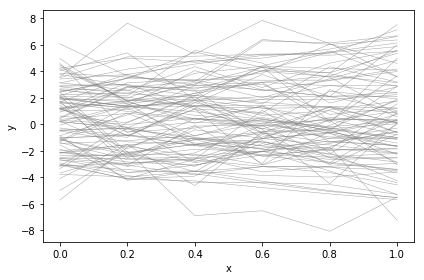

In [21]:
# Solution

for y_prior in trace['y']:
    thinkplot.plot(xs, y_prior, color='gray', linewidth=0.5)
    
thinkplot.decorate(xlabel='x',
                   ylabel='y')

In [22]:
# Solution

with pm.Model() as model:
    slope = pm.Uniform('slope', -4, 4)
    inter = pm.Uniform('inter', -4, 4)
    sigma = pm.Uniform('sigma', 0, 2)

    y_est = slope*xs + inter
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=ys)
    trace = pm.sample(1000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, inter, slope]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:05<00:00, 2210.20draws/s]
The acceptance probability does not match the target. It is 0.8882283946866933, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


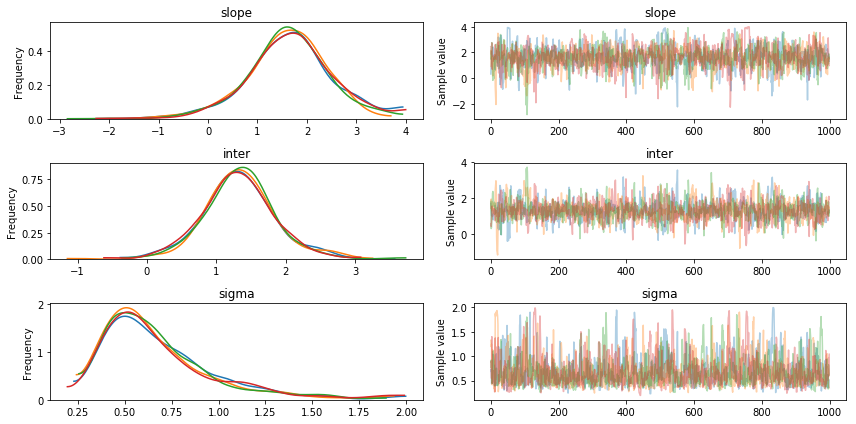

In [23]:
# Solution

pm.traceplot(trace);

The posterior distributions for these parameters should be similar to what we got with the grid algorithm.